In [1]:
#Data Manipulation 
import numpy as np
import pandas as pd

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sb
from plotly import tools
import plotly.graph_objs as go
import plotly.offline as py
%matplotlib inline

#Text Preprocessing-stopword removal
import re
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
!pip install stop_words
from stop_words import get_stop_words
import nltk
nltk.download('stopwords')
nltk.download('punkt')

#Natural Language Toolkit
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from textblob import TextBlob
import string

#Feature Extraction
from sklearn.feature_extraction.text import CountVectorizer

#Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

#Performance Analysis
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
read_csv_file = pd.read_csv("New_E-Commerce_Reviews.csv",header= 0, encoding= 'unicode_escape')
vars_in_column = ['Clothing ID','Age','Title','Review Text','Rating','Recommended IND','Positive Feedback Count','Division Name','Department Name','Class Name']

In [3]:
df=pd.DataFrame(data=read_csv_file,columns=vars_in_column)
df.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767.0,33.0,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0.0,Initmates,Intimate,Intimates
1,1080.0,34.0,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4.0,General,Dresses,Dresses
2,1077.0,60.0,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0.0,General,Dresses,Dresses
3,1049.0,50.0,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0.0,General Petite,Bottoms,Pants
4,847.0,47.0,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6.0,General,Tops,Blouses


In [4]:
df.describe()

,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,28817.000000,28817.000000,23486.000000
mean,918.118709,43.198544,3.604782,0.670229,2.535936
std,203.298980,12.279544,1.595100,0.470138,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,861.000000,34.000000,2.000000,0.000000,0.000000
50%,936.000000,41.000000,4.000000,1.000000,1.000000
75%,1078.000000,52.000000,5.000000,1.000000,3.000000
max,1205.000000,99.000000,5.000000,1.000000,122.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28817 entries, 0 to 28816
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Clothing ID              23486 non-null  float64
 1   Age                      23486 non-null  float64
 2   Title                    19676 non-null  object 
 3   Review Text              27972 non-null  object 
 4   Rating                   28817 non-null  int64  
 5   Recommended IND          28817 non-null  int64  
 6   Positive Feedback Count  23486 non-null  float64
 7   Division Name            23472 non-null  object 
 8   Department Name          23472 non-null  object 
 9   Class Name               23472 non-null  object 
dtypes: float64(3), int64(2), object(5)
memory usage: 2.2+ MB


In [0]:
a = df['Review Text'].str.lower().str.cat(sep=' ')

# removes punctuation, numbers
b = re.sub('[^A-Za-z]+', ' ', a)

#remove all the stopwords from the text
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)

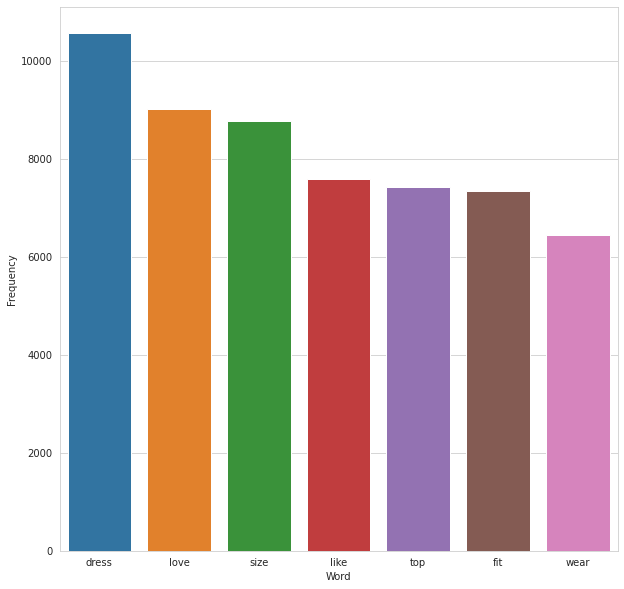

In [7]:
words_num = 100
#Tokenization to convert into word tokens
word_tokens = word_tokenize(b)
filtered_sentence = [word for word in word_tokens if not word in stop_words]
filtered_sentence = []
for word in word_tokens:
    if word not in stop_words:
        filtered_sentence.append(word)
        
# Remove characters which have length less than 2  
without_single_chr = [word for word in filtered_sentence if len(word) > 2]

# Remove numbers
cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        

# Frequency distribution
word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(words_num), columns=['Word', 'Frequency'])
plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.barplot(x="Word",y="Frequency", data=rslt.head(7))

In [10]:
class_name = df['Class Name'].value_counts()

avg_rcn = df.groupby('Class Name').agg({'Rating': np.average})

rat_and_reviews = go.Scatter3d( x = avg_rcn.index,
                                y = avg_rcn['Rating'],
                                z = class_name[avg_rcn.index],
                                mode = 'markers',
                                marker = dict(size=10,color=avg_rcn['Rating']),
                                hoverinfo ="text",
                                text="Class: "+avg_rcn.index+" \ Average Rating: "+avg_rcn['Rating'].map(' {:,.2f}'.format).apply(str)+" \ Number of Reviewers: "+class_name[avg_rcn.index].apply(str)
                              )
review_data = [rat_and_reviews]
layout_3d = go.Layout(title="3D plot of Avg rating, class and number of reviewers",
                   scene = dict(
                   xaxis = dict(title='Class'),
                   yaxis = dict(title='Average Rating'),
                   zaxis = dict(title='Number of Sales'),),
                   margin = dict(l=30, r=30, b=30, t=30))
fig_3d = go.Figure(data=review_data, layout=layout_3d)
py.iplot(fig_3d)
plt.savefig('3D_Scatter.png')

<Figure size 432x288 with 0 Axes>

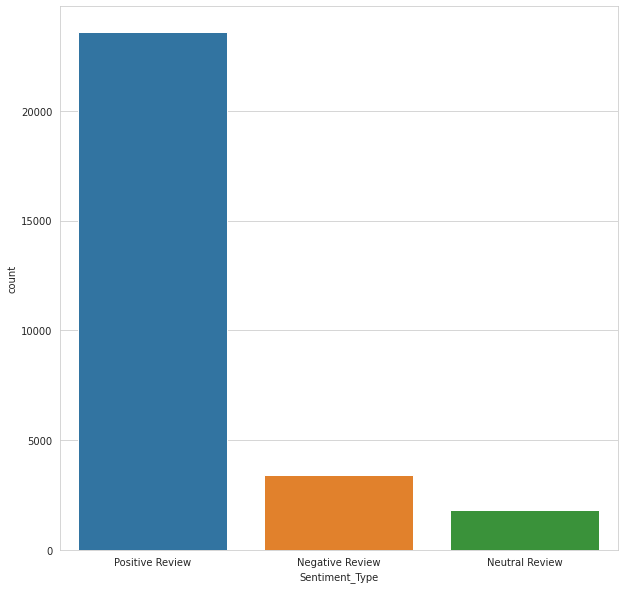

In [11]:
#Textblob module to find the sentimental polarity
from textblob import TextBlob

bloblist_desc = list()

df_review_str=df['Review Text'].astype(str)
for row in df_review_str:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    df_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['Review','sentiment','polarity'])
 
def f(df_polarity_desc):
    if df_polarity_desc['sentiment'] > 0:
        val = "Positive Review"
    elif df_polarity_desc['sentiment'] == 0:
        val = "Neutral Review"
    else:
        val = "Negative Review"
    return val

df_polarity_desc['Sentiment_Type'] = df_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sb.set_style("whitegrid")
ax = sb.countplot(x="Sentiment_Type", data=df_polarity_desc)

In [12]:
#Text Processing
def text_preprocessing(review):
    nopunc=[word for word in review if word not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
df['Review Text'].head(5).apply(text_preprocessing)

0    [Absolutely, wonderful, silky, sexy, comfortable]
1    [Love, dress, sooo, pretty, happened, find, st...
2    [high, hopes, dress, really, wanted, work, ini...
3    [love, love, love, jumpsuit, fun, flirty, fabu...
4    [shirt, flattering, due, adjustable, front, ti...
Name: Review Text, dtype: object

In [0]:
#Taking the variable review text and rating(1-bad, 5-best)
df=df.dropna(axis=0,how='any')
rating_class = df[(df['Rating'] == 1) | (df['Rating'] == 5)]
x=rating_class['Review Text']
y=rating_class['Recommended IND']


In [14]:
#Feature Extraction using bag of Words
bagofwords_vector = CountVectorizer(analyzer=text_preprocessing).fit(x)
print(len(bagofwords_vector.vocabulary_))
x_review = bagofwords_vector.transform(x)


13950


In [0]:
#Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x_review, y, test_size=0.3, random_state=101)

In [16]:
#SVM classifier
classifier_svm= SVC(C= 1, kernel='rbf', probability=True)
classifier_svm.fit(x_train, y_train.ravel())

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
#Predicting using SVM
predict_svm=classifier_svm.predict(x_test)



In [18]:
#Accuracy of the SVM model 
print(confusion_matrix(y_test, predict_svm))
print('\n')
print(classification_report(y_test, predict_svm))
print("Accuracy of SVM Model is ", accuracy_score(y_test, predict_svm) * 100)

[[  42  161]
 [   2 3260]]


              precision    recall  f1-score   support

           0       0.95      0.21      0.34       203
           1       0.95      1.00      0.98      3262

    accuracy                           0.95      3465
   macro avg       0.95      0.60      0.66      3465
weighted avg       0.95      0.95      0.94      3465

Accuracy of SVM Model is  95.2958152958153


In [19]:
#Random Forest classifier
classifier = RandomForestClassifier(n_estimators=5, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [0]:
predict_rf=classifier.predict(x_test)


In [21]:
print(confusion_matrix(y_test, predict_rf))
print('\n')
print(classification_report(y_test, predict_rf))
print("Accuracy of Random Forest Classifier is ",accuracy_score(y_test, predict_rf) * 100)

[[  42  161]
 [  22 3240]]


              precision    recall  f1-score   support

           0       0.66      0.21      0.31       203
           1       0.95      0.99      0.97      3262

    accuracy                           0.95      3465
   macro avg       0.80      0.60      0.64      3465
weighted avg       0.94      0.95      0.93      3465

Accuracy of Random Forest Classifier is  94.71861471861472


In [23]:
#Multinomial Naivebayes
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [0]:
predict_nb=nb.predict(x_test)


In [25]:
print(confusion_matrix(y_test, predict_nb))
print('\n')
print(classification_report(y_test, predict_nb))
print("Accuracy of Multinomial Naive bayes is ",accuracy_score(y_test, predict_nb) * 100)

[[  66  137]
 [  16 3246]]


              precision    recall  f1-score   support

           0       0.80      0.33      0.46       203
           1       0.96      1.00      0.98      3262

    accuracy                           0.96      3465
   macro avg       0.88      0.66      0.72      3465
weighted avg       0.95      0.96      0.95      3465

Accuracy of Multinomial Naive bayes is  95.58441558441558


In [26]:
accuracies = cross_val_score(estimator = nb, X=x_train, y = y_train.ravel(), cv = 20)
mean_accuracy= accuracies.mean()*100
std_accuracy= accuracies.std()*100
print("The mean accuracy in %: ", accuracies.mean()*100)
print("The standard deviation in % ", accuracies.std()*100)
print("The accuracy of our model in % is betweeen {} and {}".format(mean_accuracy-std_accuracy, mean_accuracy+std_accuracy))

The mean accuracy in %:  95.39833149981665
The standard deviation in %  0.37810849830722504
The accuracy of our model in % is betweeen 95.02022300150942 and 95.77643999812388


In [27]:
#Testing of Model with positive review
positive_rating=df['Review Text'][17]
positive_rating

"Took a chance on this blouse and so glad i did. i wasn't crazy about how the blouse is photographed on the model. i paired it whit white pants and it worked perfectly. crisp and clean is how i would describe it. launders well. fits great. drape is perfect. wear tucked in or out - can't go wrong."

In [28]:
# 1-means positive
positive_afterbow = bagofwords_vector.transform([positive_rating])
nb.predict(positive_afterbow)[0]

1

In [31]:
#Testing of Model with negative review
rating_negative=df['Review Text'][61]
rating_negative

"3 tags sewn in, 2 small (about 1'' long) and 1 huge (about 2'' x 3''). very itchy so i cut them out. then the thread left behind was plasticy and even more itchy! how can you make an intimates item with such itchy tags? not comfortable at all! also - i love bralettes and wear them all the time including to work. i am a b cup. however, this one is so thin and flimsy that it gives no support even to a b cup - so for me this would only be a lounging bralette - if it wasn't so itchy!"

In [32]:
# 0-means negative
rating_negative_transformed = bagofwords_vector.transform([rating_negative])
nb.predict(rating_negative_transformed)[0]

0

In [0]:
# calculate the fpr and tpr for all thresholds of the classification
#MultiNomialNaiveBayes
probs = nb.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr) 

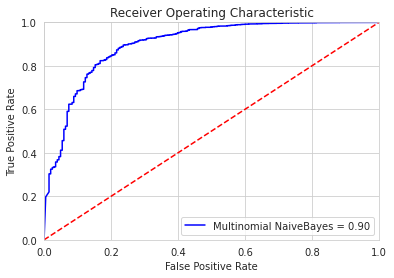


Multinomial NaiveBayes ROC_AUC_SCORE  : 89.83510675248344


In [34]:
#Receiver Operating Characteristic Curve(ROC curve)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'Multinomial NaiveBayes = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("\nMultinomial NaiveBayes ROC_AUC_SCORE  :", roc_auc*100)